In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
from umap import UMAP
from tqdm import tqdm

In [4]:
atten = pd.read_feather('/fast/rsna-breast/tables/attn_scores_sweet_laughter_413.feather')

In [5]:
# link with cancer at image level
labels = pd.read_csv('/fast/rsna-breast/train.csv')
atten = atten.merge(labels, left_on='imgID', right_on='image_id')

<AxesSubplot: xlabel='raw', ylabel='Count'>

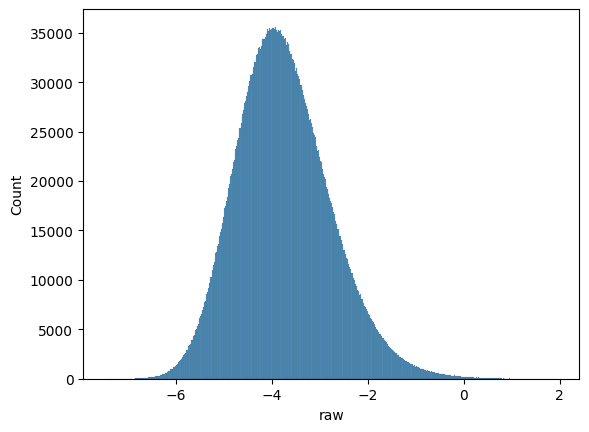

In [8]:
sns.histplot(data=atten, x='raw')

<AxesSubplot: xlabel='attention', ylabel='Count'>

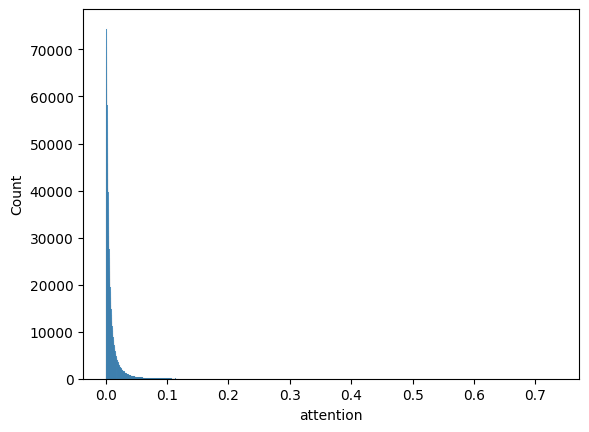

In [9]:
sns.histplot(data=atten, x='attention')

In [3]:
!realpath /fast/rsna-breast/tables/*

/fast/rsna-breast/tables/attn_scores_apricot_sweep_45.feather
/fast/rsna-breast/tables/attn_scores_sweet_laughter_413.feather
/fast/rsna-breast/tables/newerButStillBroken
/fast/rsna-breast/tables/old_broken
/fast/rsna-breast/tables/parts
/fast/rsna-breast/tables/tile_224_stats_sorted.feather
/fast/rsna-breast/tables/tile_384_stats_sorted.feather


In [65]:
topAttnTiles = atten.sort_values('attention', ascending=False).groupby('image_id').head(1)

In [66]:
topAttnTiles

,level_0,index,ptID,imgID,row,col,nonzeroFrac,attention,raw,site_id,...,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
362879,362879,4589447,3996,2016160657,7,0,1.000000,0.734592,-1.250692,2,...,CC,67.0,0,0,0,NaN,0,NaN,21,False
5394168,5394168,1935275,60519,1941196911,10,13,1.000000,0.721233,1.437469,1,...,CC,50.0,1,1,1,0.0,0,C,49,False
1228396,1228396,634356,13668,1015118231,10,1,1.000000,0.715285,1.205014,1,...,CC,50.0,0,1,0,0.0,0,C,49,True
362822,362822,4589429,3996,834384311,8,0,1.000000,0.693141,0.217440,2,...,MLO,67.0,0,0,0,NaN,0,NaN,21,False
1215807,1215807,2523107,13538,1022103627,7,8,1.000000,0.690405,0.374471,2,...,CC,60.0,0,0,0,NaN,0,NaN,21,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67421,67421,2972368,822,1942326353,2,1,1.000000,0.012167,-1.825777,1,...,MLO,44.0,0,0,0,1.0,0,B,210,False
1974221,1974221,1040671,22134,1725239353,18,0,1.000000,0.012014,-2.195648,1,...,CC,62.0,0,0,0,1.0,0,C,210,False
2954691,2954691,2769409,33084,1990776518,15,4,1.000000,0.011669,-1.734555,2,...,MLO,50.0,0,0,0,NaN,0,NaN,29,False
2782814,2782814,1768252,31042,618799399,16,10,0.852838,0.011405,-2.556454,1,...,CC,44.0,0,0,0,0.0,0,C,210,True


In [6]:
# get top tiles for both cancer and noncancer

topCancer = atten[atten.cancer==1].sort_values('raw', ascending=False).head(1000)
topNonCancer = atten[atten.cancer==0].sort_values('raw', ascending=False).head(1000)

In [7]:
topCancer

,level_0,index,ptID,imgID,row,col,nonzeroFrac,attention,raw,site_id,...,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
4205196,4205196,2475891,47129,1251467516,4,12,1.0,0.066824,1.937381,2,...,CC,70.0,1,1,1,NaN,0,NaN,48,False
4205244,4205244,2476028,47129,1251467516,10,12,1.0,0.061143,1.848520,2,...,CC,70.0,1,1,1,NaN,0,NaN,48,False
5394069,5394069,1935269,60519,1303753411,7,11,1.0,0.654472,1.813499,1,...,MLO,50.0,1,1,1,0.0,0,C,49,False
1873504,1873504,5763614,21067,715321439,5,12,1.0,0.624250,1.799445,1,...,CC,47.0,1,1,0,0.0,0,C,49,False
2604812,2604812,625767,28936,218134651,5,4,1.0,0.237070,1.700646,1,...,CC,47.0,1,1,1,0.0,0,C,49,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5379845,5379845,4349342,60410,1597116280,7,10,1.0,0.117238,-0.308063,1,...,MLO,65.0,1,1,0,0.0,0,B,49,False
1492710,1492710,3956166,16703,612451325,2,7,1.0,0.138129,-0.308105,1,...,MLO,51.0,1,1,0,0.0,0,C,49,False
900423,900423,3685559,10130,1672636630,10,7,1.0,0.053781,-0.308987,1,...,MLO,71.0,1,1,1,0.0,0,B,49,False
1108168,1108168,1425332,12392,1420153030,10,8,1.0,0.120865,-0.309871,1,...,MLO,55.0,1,1,1,0.0,0,C,49,False


# Gathering tensors from existing tensorfiles would be a pain, since I'd need to index them positionally in the attenDF dataframe. Since the eventual downstream purpose of this is to evaluate encoders though, maybe I can just recompute the tensors

In [20]:
dev = torch.device('cuda')

In [22]:
import timm
import torch
def getModel(encoder, num_classes=0):
    model = timm.create_model(encoder, pretrained=True, num_classes=num_classes)
    o = model(torch.randn(2, 3, 224, 224))
    print(f'Original shape: {o.shape}')
    assert len(o.shape)==2
    embSize = o.shape[1]
    #o = model.forward_features(torch.randn(2, 3, 224, 224))
    #print(f'Unpooled shape: {o.shape}')
    return model, embSize

deit, embSize = getModel('deit3_small_patch16_224')
deit.to(dev)


Original shape: torch.Size([2, 384])


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop2): Dropout(p=0.0, inplace

In [27]:
from PIL import Image
from torchvision import transforms as T


def getTile(R):
    fn = f'/fast/rsna-breast/newtiles/224/{int(R.ptID)}/{int(R.imgID)}_{int(R.row)}_{int(R.col)}.png'
    return Image.open(fn).convert('RGB')
    
# FIXME - normalize
transform = T.Compose([
    T.ToTensor()
])

deit.eval()
def computeEmbeddings(df):
    embeddings = []
    for idx, row in tqdm(df.iterrows(), total=len(df)):
        tile = getTile(row)
        imgTensor = transform(tile)
        imgTensor = torch.stack([imgTensor]).to(dev)
        emb = deit(imgTensor).detach().cpu().numpy()
        #print(emb.shape)
        embeddings.append(emb)
    return embeddings

cancerEmbs = computeEmbeddings(topCancer)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.34it/s]


In [35]:
noncancerEmbs = computeEmbeddings(topNonCancer)


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.89it/s]


In [37]:
embsArr = np.concatenate(cancerEmbs+noncancerEmbs)

In [38]:
topDF = pd.concat([topCancer, topNonCancer])

In [39]:
C = topDF.cancer

In [41]:
UM = UMAP()
manifold = UM.fit_transform(embsArr)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [42]:
manifold

array([[6.0901093, 3.935367 ],
       [3.271054 , 5.7089853],
       [6.379223 , 3.1495755],
       ...,
       [8.754934 , 9.366178 ],
       [7.5443816, 7.671989 ],
       [7.5540094, 6.1879168]], dtype=float32)

In [43]:
topDF['x'] = manifold[:,0]
topDF['y'] = manifold[:,1]

<AxesSubplot: xlabel='x', ylabel='y'>

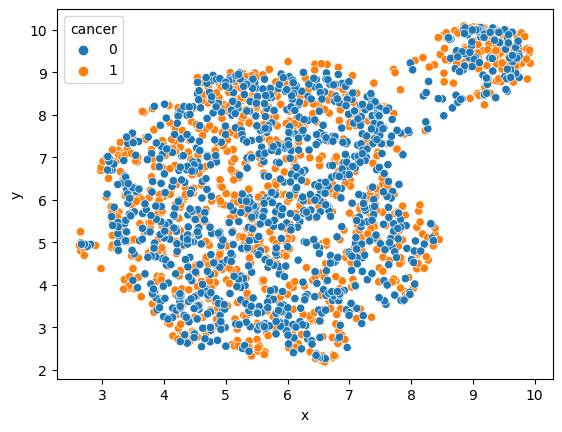

In [44]:
sns.scatterplot(data=topDF, x='x', y='y', hue=topDF.cancer)

In [52]:
from sklearn import linear_model
from sklearn import metrics
logReg = linear_model.LogisticRegression()

In [50]:
LR = logReg.fit(embsArr, topDF.cancer)

/home/cosmo/miniconda3/envs/mammography/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
preds = LR.predict_proba(embsArr)

In [ ]:
metrics.plot_roc_curve(estimator, X, y)

In [62]:
topDF.cancer.value_counts()

1    1000
0    1000
Name: cancer, dtype: int64

AUC is 0.8444840000000001 .... F1 is 0.7607607607607607


<AxesSubplot: >

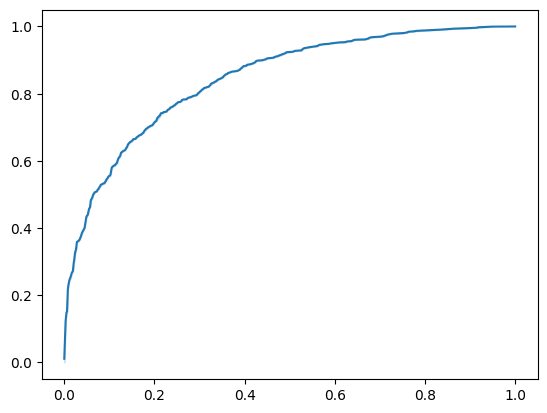

In [64]:
cls = 1
fpr, tpr, thresh = metrics.roc_curve(topDF.cancer, preds[:,cls])
AUC = metrics.roc_auc_score(topDF.cancer, preds[:,cls])
pred = 1.0*(preds[:,cls]>0.5)
F1 = metrics.f1_score(topDF.cancer, pred)
print(f'AUC is {AUC} .... F1 is {F1}')
sns.lineplot(x=fpr, y=tpr)

In [71]:
metrics.roc_auc_score(topDF.cancer, preds[:,1])

0.8444840000000001

AUC is 0.15551600000000002 .... F1 is 0.23976023976023977


<AxesSubplot: >

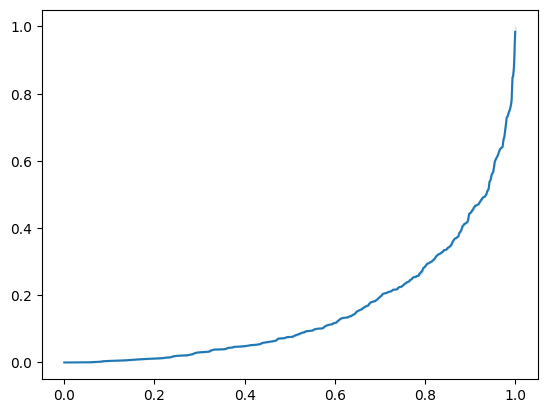

In [67]:
cls = 0
fpr, tpr, thresh = metrics.roc_curve(topDF.cancer, preds[:,cls])
AUC = metrics.roc_auc_score(topDF.cancer, preds[:,cls])
pred = 1.0*(preds[:,cls]>0.5)
F1 = metrics.f1_score(topDF.cancer, pred)
print(f'AUC is {AUC} .... F1 is {F1}')
sns.lineplot(x=fpr, y=tpr)